## Pratik kadam 
NLP Project on Sentiment Analysis 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\PRATIK\flipkart_review_data_2022_02.csv")
df.head(3)

,Unnamed: 0,ProductUrl,productTitle,productPrice,averageRating,reviewTitle,reviewDescription,reviewAuthor,reviewAt,reviewLikes,reviewDislikes,certifiedBuyer,reviewerLocation,scrapedAt,uniqId
0,0,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Excellent,Very good product,palakollu komali,6 months ago,0,1,True,Tenali,20/02/2022 02:03:42,4e9df8d3-736c-5dae-b867-b92b7f09fc84
1,1,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Really Nice,Nice and super picture quality.and sound also ...,Yogesh Virkar,3 months ago,0,0,True,Mumbai,20/02/2022 02:03:42,7ba04258-9f05-5642-ba33-8982db1f6c5e
2,2,https://www.flipkart.com/lg-108-cm-43-inch-ult...,LG 108 cm (43 inch) Ultra HD (4K) LED Smart TV,"₹36,499",4.4,Super!,This is excellent picture qualityUltimate soun...,Sudhir Kumar Chaudhary,3 months ago,0,0,True,Haridwar,20/02/2022 02:03:42,bfb20e97-eacf-5b76-a5eb-91999d6bd7a3


In [3]:
df=pd.DataFrame(df.reviewDescription)
df.head(3)

,reviewDescription
0,Very good product
1,Nice and super picture quality.and sound also ...
2,This is excellent picture qualityUltimate soun...


### Data cleaning

#### Converting in Lower case

In [4]:
df.text = df.reviewDescription.str.lower()

#### Removing URl

In [5]:
df.reviewDescription = df.reviewDescription.str.replace(r'http\S+|www.\S+','',case=False)  # | = or 

#### Removing Punctuation

In [6]:
import string
string.punctuation

def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [7]:
df.reviewDescription = df.reviewDescription.apply(lambda x : remove_punctuation(x))  # x = Text 

#### Removing Numbers 

In [8]:
df['reviewDescription'] = df['reviewDescription'].str.replace('\d+','')  # data.text  or data['text']

#### Removing stopwords 

In [32]:
import nltk

from nltk.corpus import stopwords

stop = stopwords.words('english')

In [10]:
df['reviewDescription'] = df['reviewDescription'].apply(lambda x: ' '.join([abc   
                                                      for abc in x.split() 
                                                      if abc not in (stop)]))

In [33]:
import re 
words = set(nltk.corpus.words.words()) # corpus & set array 

#### Apply a second round of cleaning

In [12]:

def clean_text_round2(reviewDescription):
    
    reviewDescription =  re.sub('tv', '', reviewDescription) 
    reviewDescription =  re.sub('lg','', reviewDescription) 
    reviewDescription =  re.sub('sound','', reviewDescription)
    reviewDescription =  re.sub('picture','', reviewDescription)
    
    reviewDescription =  re.sub(r"\b[a-zA-Z]\b", "", reviewDescription)
    reviewDescription =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", reviewDescription)  
    reviewDescription =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(reviewDescription)  
                      if w.lower() in words)     
    
    return reviewDescription

In [13]:
df['reviewDescription']=df['reviewDescription'].apply(lambda x : clean_text_round2(x))
df = pd.DataFrame(df.reviewDescription.apply(lambda x: clean_text_round2(x)))
df.head(3)

,reviewDescription
0,Very good product
1,Nice super also one disappointed good
2,This excellent Good classic


In [14]:
df.iloc[5,0]

'Great good wonderful experience'

In [31]:
from nltk.stem import WordNetLemmatizer 
import nltk

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() 

In [16]:
def lemmatize_reviewDescription(reviewDescription):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(reviewDescription)]

In [17]:
df.reviewDescription = df.reviewDescription.apply(lambda x :' '.join(lemmatize_reviewDescription(x)))

In [18]:
# strip extra whitespace
df['reviewDescription'] = (df['reviewDescription'].astype("str").str.rstrip())

In [19]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(df.reviewDescription)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,freq
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
ache,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,334,335,336,337,338,339,340,341,342,freq
0,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,access,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,ache,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(3)

,Word,freq
212,good,209
375,quality,144
365,product,51


In [23]:
text = " ".join(review for review in df.reviewDescription)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 18838 words in the combination of all review.


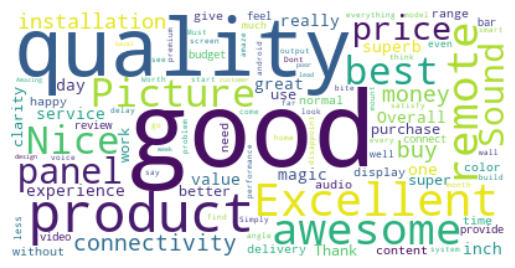

In [24]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)


plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") 
plt.show()

In [25]:
df = df.drop_duplicates('reviewDescription') 
df.head(3)

,reviewDescription
0,Very good product
1,Nice super also one disappoint good
2,This excellent Good classic


In [26]:

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
df['polarity'] = df['reviewDescription'].apply(pol)
df.head(5)

,reviewDescription,polarity
0,Very good product,0.910000
1,Nice super also one disappoint good,0.544444
2,This excellent Good classic,0.622222
3,Nice,0.600000
4,Dont negative Just give price Superb performan...,0.619643


In [27]:
import numpy as np
df['Sentiment'] = np.where(df['polarity']>= 0, 'Positive', 'Negative')
df.head()

,reviewDescription,polarity,Sentiment
0,Very good product,0.910000,Positive
1,Nice super also one disappoint good,0.544444,Positive
2,This excellent Good classic,0.622222,Positive
3,Nice,0.600000,Positive
4,Dont negative Just give price Superb performan...,0.619643,Positive


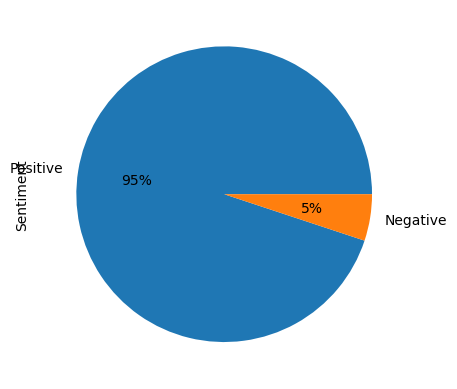

In [28]:
df.Sentiment.value_counts().plot.pie(autopct="%.f%%");